# My Data Analysis

In [12]:
import pandas as pd 
import numpy as np
import time
import os, sys
import numpy as np
from numpy import linalg
import pandas as pd
from scipy import stats
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from utility.praser import deleteNAN

## Bielefeld Data

In [13]:
uwb_raw = "../../my_data/bielefeld_dataset/uwb_raw_data/downSample_uwb_FullDataSet.txt"
bielefeld_data = pd.read_csv(uwb_raw)
bielefeld_data.head()

,Dist,FP,FPAmp1,FPAmp2,FPAmp3,CIR,stdN,maxN,preamCnt,RSS_CIR,RSS_FP,powerDiff,Label
0,3.09,47631,2336,2218,1849,350,28,721,123,-92.140816,-86.922323,5.218493,1
1,5.25,47854,2240,2268,1529,346,28,707,123,-92.569257,-86.972242,5.597015,1
2,6.05,47734,2190,1980,1201,297,12,301,122,-93.398729,-87.564533,5.834196,1
3,14.08,47692,805,1741,1606,163,12,249,123,-95.573509,-90.241127,5.332382,1
4,1.10,47666,2427,2404,1543,359,16,445,123,-92.061217,-86.812058,5.249159,1


In [14]:
bielefeld_data.size

2415270

## Toronto Data

In [15]:
anchor_metal = "../../my_data/identification-dataset/nlos/anAn/metal/data1/metal-anAn-data1_data.csv"
toronto_data_an = pd.read_csv(anchor_metal)
toronto_data_an.head()

,tdoa12,tdoa21,snr_an1,power_dif_an1,snr_an2,power_dif_an2,an1_rx_snr,an1_rx_powerdif,an1_tof,an2_rx_snr,an2_rx_powerdif,an2_tof
0,-0.112602,0.220513,119.031250,11.548676,148.333328,11.746056,45.049999,23.353745,5.196789,35.250000,22.573402,5.178022
1,-0.164212,0.140753,150.357147,11.167908,136.142853,11.879990,29.583334,24.532982,5.187406,39.250000,23.520226,5.178022
2,-0.037534,0.117294,123.187500,11.339127,125.857140,11.682205,42.049999,23.920013,5.126413,40.700001,23.999695,5.187406
3,-0.037534,0.117294,123.187500,11.339127,152.333328,11.851372,33.875000,24.098022,5.192098,41.799999,22.996468,5.154563
4,-0.197054,0.192362,144.500000,11.113533,138.000000,11.928688,42.549999,23.576332,5.131104,40.299999,23.636536,5.131104


In [16]:
# splitting the data into anchor 1 and 2
t_data_an1 = toronto_data_an[['tdoa12', 'snr_an1', 'power_dif_an1', 'an1_rx_snr', 'an1_rx_powerdif', 'an1_tof']].copy()
t_data_an2 = toronto_data_an[['tdoa21', 'snr_an2', 'power_dif_an2', 'an2_rx_snr', 'an2_rx_powerdif', 'an2_tof']].copy()

In [17]:
# adding NLOS causing material information
t_data_an1['NLOS_material'] = 'metal'
t_data_an1['NLOS_material'] = 'nothing'

In [18]:
tag_metal = "../../my_data/identification-dataset/nlos/anTag/metal/data1/metal-anTag-data1_data.csv"
toronto_data_tag = pd.read_csv(tag_metal)
toronto_data_tag.head()

,tdoa12,tdoa21,snr_an1,power_dif_an1,snr_an2,power_dif_an2,an1_rx_snr,an1_rx_powerdif,an1_tof,an2_rx_snr,an2_rx_powerdif,an2_tof
0,-0.319040,0.380033,24.450001,23.648659,153.833328,11.635933,132.000000,14.551033,5.037270,168.541672,13.384590,5.018502
1,-0.319040,0.380033,24.450001,23.648659,162.750000,11.179535,172.666672,14.281364,5.056036,176.125000,13.252098,5.041961
2,-0.319040,0.319040,14.928572,25.917366,162.750000,11.179535,203.149994,14.264801,5.088879,148.850006,13.729012,5.065420
3,-0.464485,0.319040,20.607143,26.443871,187.500000,11.430855,159.000000,13.419594,5.084187,174.600006,13.297188,5.056036
4,-0.300273,0.323732,26.416666,25.613457,161.416672,11.633659,226.899994,13.669937,5.060728,195.600006,13.437340,5.051345


In [19]:
t_data_tag_an1 = toronto_data_tag[['tdoa12', 'snr_an1', 'power_dif_an1', 'an1_rx_snr', 'an1_rx_powerdif', 'an1_tof']].copy()
t_data_tag_an2 = toronto_data_tag[['tdoa21', 'snr_an2', 'power_dif_an2', 'an2_rx_snr', 'an2_rx_powerdif', 'an2_tof']].copy()

In [20]:
t_data_an1.rename({'tdoa12':'tdoa', 
                   'snr_an1':'snr_an', 
                   'power_dif_an1':'power_dif', 
                   'an1_rx_snr':'rx_snr', 
                   'an1_rx_powerdif':'rx_powerdif', 
                   'an1_tof':'tof'}, axis=1, inplace=True)

t_data_an2.rename({'tdoa21':'tdoa',
                   'snr_an2':'snr_an', 
                   'power_dif_an2':'power_dif', 
                   'an2_rx_snr':'rx_snr', 
                   'an2_rx_powerdif':'rx_powerdif', 
                   'an2_tof':'tof'}, axis=1, inplace=True)



In [21]:
t_data_an = pd.concat([t_data_an1, t_data_an2], ignore_index=True, sort=False)
t_data_an['NLOS_material'].unique()

array(['nothing', nan], dtype=object)

## Visualize Toronto Data

In [22]:
FONTSIZE = 18;   TICK_SIZE = 16
# set window background to white
plt.rcParams['figure.facecolor'] = 'w'
# set the labelsize of xtick and ytick
matplotlib.rc('xtick', labelsize=TICK_SIZE) 
matplotlib.rc('ytick', labelsize=TICK_SIZE)

In [23]:
def plot_obs(ob_x,obstacle):
    for i in range(4):
        for j in range(i,4):
            ob_x.plot([obstacle[i,0], obstacle[j,0]], [obstacle[i,1], obstacle[j,1]], [obstacle[i,2], obstacle[j,2]], linewidth=1, label='_nolegend_', color='k')
    
    for i in range(4,8):
        for j in range(i,8):
            ob_x.plot([obstacle[i,0], obstacle[j,0]], [obstacle[i,1], obstacle[j,1]], [obstacle[i,2], obstacle[j,2]], linewidth=1, label='_nolegend_', color='k')
    
    for i in range(4):
        ob_x.plot([obstacle[i,0], obstacle[i+4,0]], [obstacle[i,1], obstacle[i+4,1]], [obstacle[i,2], obstacle[i+4,2]], linewidth=1, label='_nolegend_', color='k')

Load Data

In [24]:
# access csv file
folder = "../../my_data/identification-dataset/nlos/anTag/metal/data1/"
# search for txt files in the folder
for file in os.listdir(folder):
    if file.endswith(".txt"):
        pose_txt = os.path.join(folder, file)

f = open(pose_txt,"r")
pos=[];    quat=[]       # position and quaternion
for line in f:
    x = line.split(",")
    if len(x) == 4:
        arr_x = [float(x[1]), float(x[2]), float(x[3])]
        pos.append(arr_x)
    if len(x) == 5:
        q_x = [float(x[1]), float(x[2]), float(x[3]), float(x[4])]
        quat.append(q_x)

pos = np.array(pos)     # [an1_p, an2_p, tag_p]
quat = np.array(quat)   # [an1_quat, an2_quat, tag_quat]
an1_p = pos[0,:]; an2_p = pos[1,:]; tag_p = pos[2,:]
obs_up = pos[3:,:]
obs_bt = np.copy(obs_up);  obs_bt[:,2] = 0 
obstacle = np.concatenate((obs_up, obs_bt), axis=0)

# search for csv files in the folder
for file in os.listdir(folder):
    if file.endswith(".csv"):
        data_csv = os.path.join(folder, file)
        
df = pd.read_csv(data_csv)

FileNotFoundError: [Errno 2] No such file or directory: '../data/identification-dataset/nlos/anTag/metal/data1/'

In [ ]:
# extract data
tdoa12 = deleteNAN(np.array(df['tdoa12']))
tdoa21 = deleteNAN(np.array(df['tdoa21']))

snr_an1 = deleteNAN(np.array(df['snr_an1']))
power_dif_an1 = deleteNAN(np.array(df['power_dif_an1']))
snr_an2 = deleteNAN(np.array(df['snr_an2']))
power_dif_an2 = deleteNAN(np.array(df['power_dif_an2']))

an1_rx_snr = deleteNAN(np.array(df['an1_rx_snr']) )
an1_rx_powerdif = deleteNAN(np.array(df['an1_rx_powerdif']))
an1_tof = deleteNAN(np.array(df['an1_tof']))

an2_rx_snr = deleteNAN(np.array(df['an2_rx_snr']) )
an2_rx_powerdif = deleteNAN(np.array(df['an2_rx_powerdif']))
an2_tof = deleteNAN(np.array(df['an2_tof']))

In [ ]:
# compute gt
gt_d_12 = linalg.norm(an2_p - tag_p) - linalg.norm(an1_p - tag_p)
gt_an = linalg.norm(an1_p - an2_p)
# compute the tdoa12 err
err12 = tdoa12 - gt_d_12

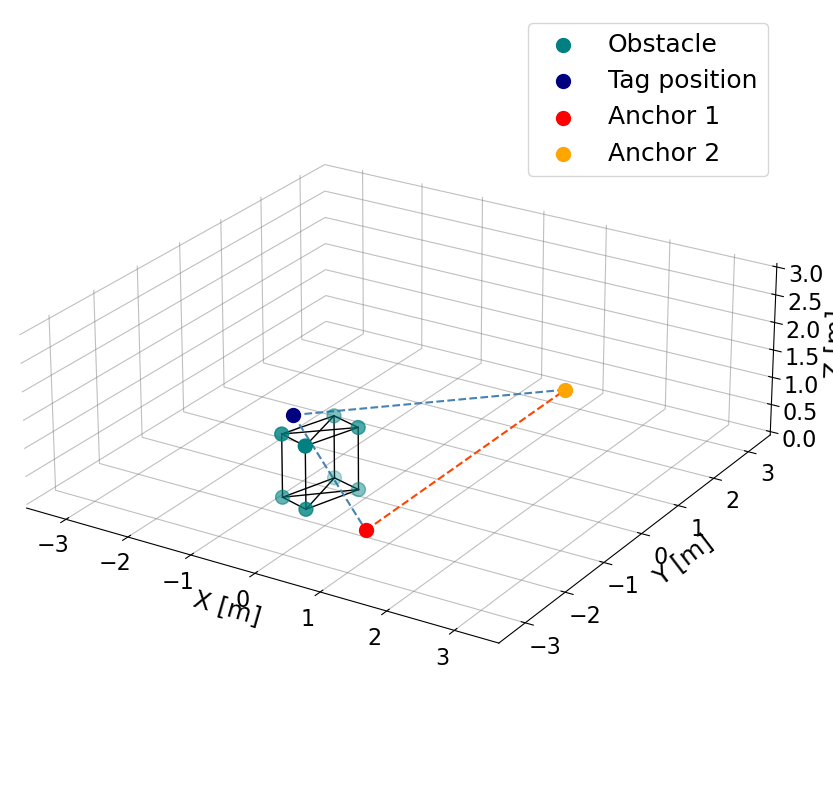

In [ ]:
# visualization
# visualize the anchor, tag and obstacle
fig_ob = plt.figure(figsize=(10, 10))
ob_x = fig_ob.add_subplot(111, projection = '3d')
# make the panes transparent
ob_x.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ob_x.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ob_x.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# change the color of the grid lines 
ob_x.xaxis._axinfo["grid"]['color'] =  (0.5,0.5,0.5,0.5)
ob_x.yaxis._axinfo["grid"]['color'] =  (0.5,0.5,0.5,0.5)
ob_x.zaxis._axinfo["grid"]['color'] =  (0.5,0.5,0.5,0.5)
if len(obstacle)!=0:
    ob_x.scatter(obstacle[:,0], obstacle[:,1], obstacle[:,2], s = 100, marker='o',color='teal', label = 'Obstacle')

# plot lines among obstacle vertices
plot_obs(ob_x,obstacle)

tag_dot = ob_x.scatter(tag_p[0],   tag_p[1],  tag_p[2], s = 100, marker='o',color='navy', label = 'Tag position')
an1_dot = ob_x.scatter(an1_p[0],   an1_p[1],  an1_p[2], s = 100, marker='o',color='red', label = 'Anchor 1')
an2_dot = ob_x.scatter(an2_p[0],   an2_p[1],  an2_p[2], s = 100, marker='o',color='orange', label = 'Anchor 2')
# plot the line segement
ob_x.plot([tag_p[0], an1_p[0]], [tag_p[1], an1_p[1]], [tag_p[2], an1_p[2]], linestyle ='--', color='steelblue', label='_nolegend_')
ob_x.plot([tag_p[0], an2_p[0]], [tag_p[1], an2_p[1]], [tag_p[2], an2_p[2]], linestyle ='--', color='steelblue', label='_nolegend_')
ob_x.plot([an1_p[0], an2_p[0]], [an1_p[1], an2_p[1]], [an1_p[2], an2_p[2]], linestyle ='--', color='orangered', label='_nolegend_')
ob_x.set_xlim3d(-3.5, 3.5)  
ob_x.set_ylim3d(-3.5, 3.5)  
ob_x.set_zlim3d(0.0, 3.0)  
ob_x.set_xlabel(r'X [m]', fontsize = FONTSIZE)
ob_x.set_ylabel(r'Y [m]', fontsize = FONTSIZE)
ob_x.set_zlabel(r'Z [m]', fontsize = FONTSIZE)
ob_x.set_box_aspect((1, 1, 0.35))               # xy aspect ratio is 1:1, but change z axis
plt.legend(loc='best', fontsize=FONTSIZE)
ob_x.view_init(24, -58)

mean0: -0.2315, std0: 0.2847


(-1.0, 1.0)

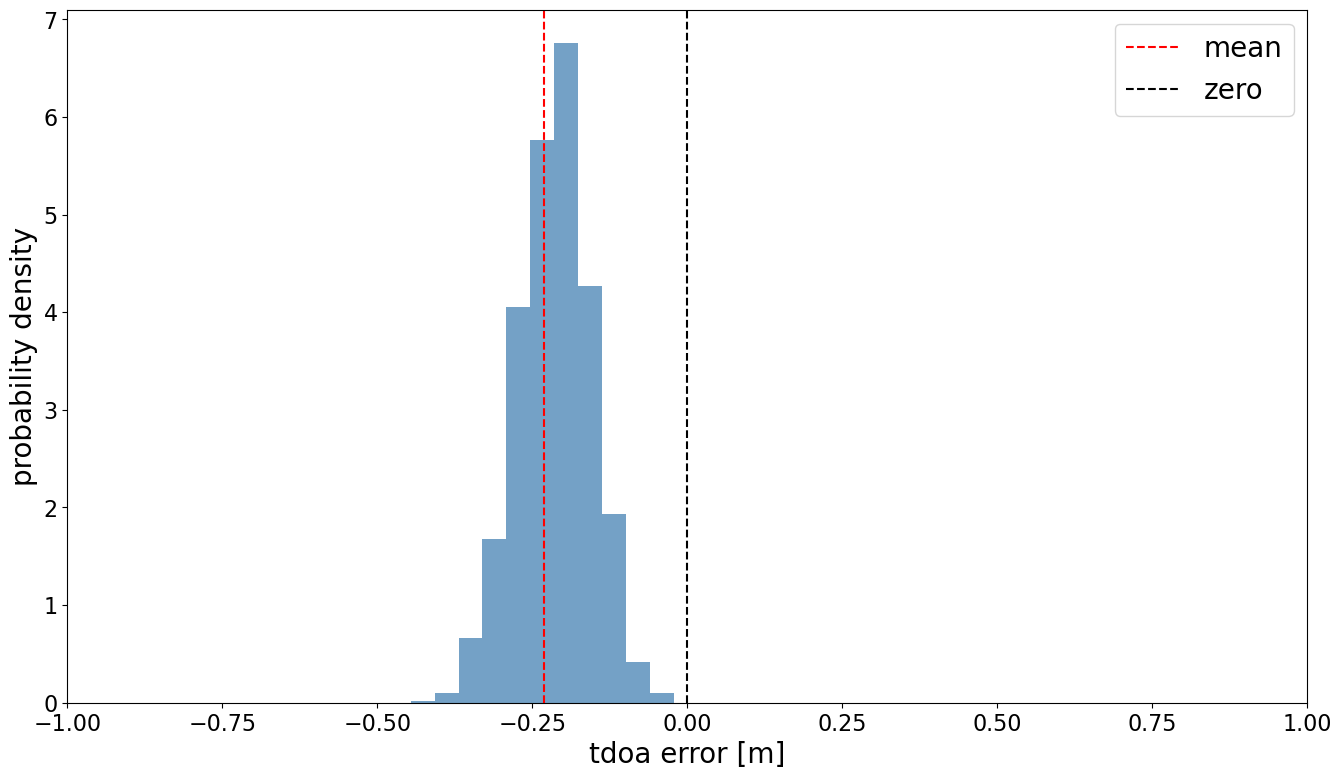

In [ ]:
fig = plt.figure(figsize=(16, 9))
mu=0;  sigma=0
ax = plt.subplot(111)
(mu, sigma) = stats.norm.fit(err12)
print("mean0: %.4f," % mu, "std0: %.4f" % sigma)
yhist, xhist, patches = plt.hist(err12, bins=180,color='steelblue',alpha=0.75, density=True)
plt.axvline(x=mu, alpha=1.0, linestyle ='--', color = 'red')
plt.axvline(x=0.0, alpha=1.0, linestyle ='--', color = 'black')
plt.legend(['mean','zero'], fontsize=20)
plt.xlabel('tdoa error [m]', fontsize=20)
plt.ylabel('probability density', fontsize=20)
ax.set_xlim([-1.0, 1.0]) 

SNR of anchor 1 mean: 22.1439, std: 3.8970
Power difference of anchor 1 mean: 25.1250, std: 1.5424
SNR of anchor 2 mean: 138.6175, std: 19.4860
Power difference of anchor 2, mean: 11.2401, std: 1.0452


Text(0, 0.5, 'probability density')

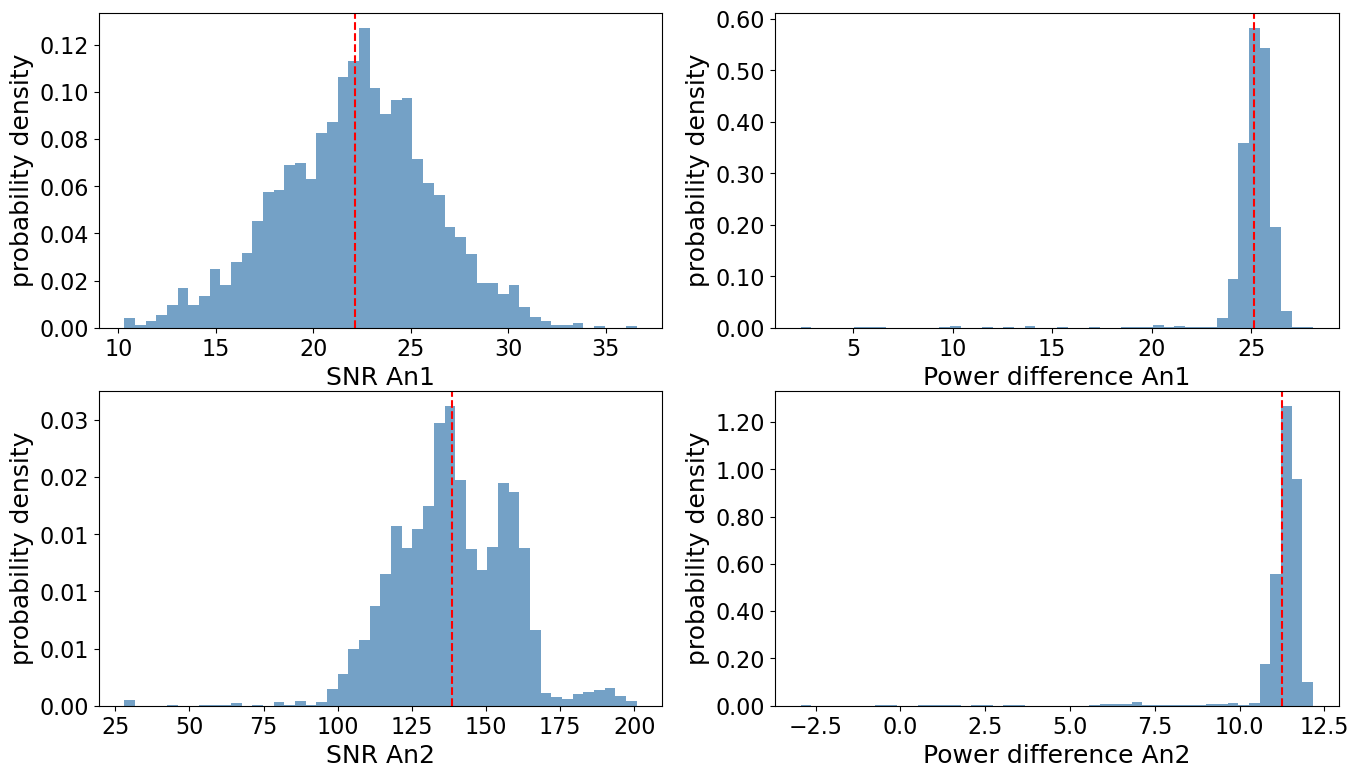

In [ ]:
# visualize power in tag side
fig1 = plt.figure(figsize=(16, 9))
ax1 = plt.subplot(2,2,1)
(mu_snr1, sigma_snr1) = stats.norm.fit(snr_an1)
print("SNR of anchor 1 mean: %.4f," % mu_snr1, "std: %.4f" % sigma_snr1)
yhist, xhist, patches = plt.hist(snr_an1, bins=48,color='steelblue',alpha=0.75, density=True)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.axvline(x=mu_snr1, alpha=1.0, linestyle ='--', color = 'red')
plt.xlabel('SNR An1', fontsize = FONTSIZE)
plt.ylabel('probability density', fontsize = FONTSIZE)

bx1 = plt.subplot(2,2,2)
(mu_power1, sigma_power1) = stats.norm.fit(power_dif_an1)
print("Power difference of anchor 1 mean: %.4f," % mu_power1, "std: %.4f" % sigma_power1)
yhist, xhist, patches = plt.hist(power_dif_an1, bins=48,color='steelblue',alpha=0.75, density=True)
bx1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.axvline(x=mu_power1, alpha=1.0, linestyle ='--', color = 'red')
plt.xlabel('Power difference An1', fontsize = FONTSIZE)
plt.ylabel('probability density', fontsize = FONTSIZE)

cx1 = plt.subplot(2,2,3)
(mu_snr2, sigma_snr2) = stats.norm.fit(snr_an2)
print("SNR of anchor 2 mean: %.4f," % mu_snr2, "std: %.4f" % sigma_snr2)
yhist, xhist, patches = plt.hist(snr_an2, bins=48,color='steelblue',alpha=0.75, density=True)
cx1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.axvline(x=mu_snr2, alpha=1.0, linestyle ='--', color = 'red')
plt.xlabel('SNR An2', fontsize = FONTSIZE)
plt.ylabel('probability density', fontsize = FONTSIZE)

dx1 = plt.subplot(2,2,4)
(mu_power2, sigma_power2) = stats.norm.fit(power_dif_an2)
print("Power difference of anchor 2, mean: %.4f," % mu_power2, "std: %.4f" % sigma_power2)
yhist, xhist, patches = plt.hist(power_dif_an2, bins=48,color='steelblue',alpha=0.75, density=True)
dx1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.axvline(x=mu_power2, alpha=1.0, linestyle ='--', color = 'red')
plt.xlabel('Power difference An2', fontsize = FONTSIZE)
plt.ylabel('probability density', fontsize = FONTSIZE)

SNR received by an1, mean: 179.8082, std: 26.5102
SNR received by an2, mean: 181.7689, std: 29.1240
Power difference received by an1, mean: 14.1423, std: 0.4692
Power difference received by an2, mean: 13.5326, std: 0.4845
Tof received by an1, mean: 5.0626, std: 0.0218
Tof received by an1, mean: 5.0611, std: 0.0213


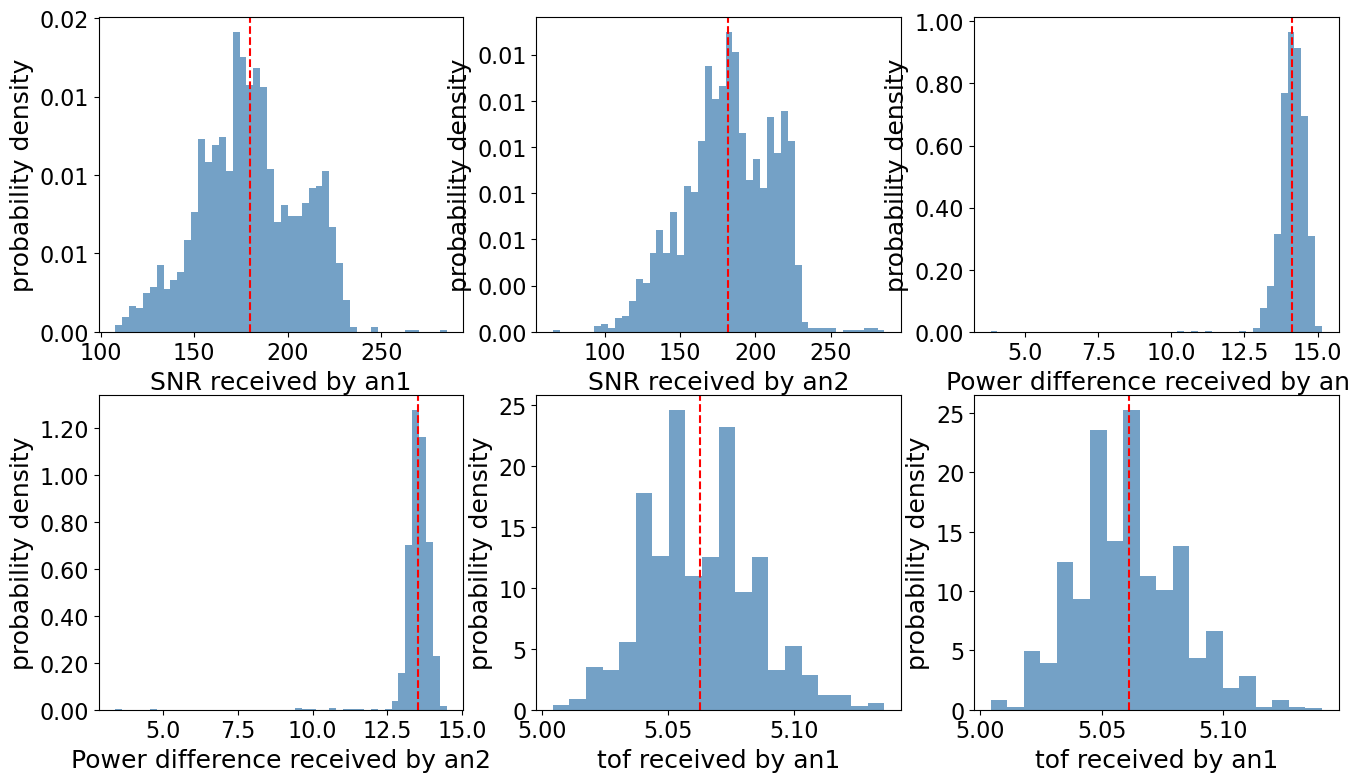

In [ ]:
# visualize power between anchors
fig2 = plt.figure(figsize=(16, 9))
px1 = fig2.add_subplot(2,3,1)
(mu_snr_rc_an1, sigma_snr_rc_an1) = stats.norm.fit(an1_rx_snr)
print("SNR received by an1, mean: %.4f," % mu_snr_rc_an1, "std: %.4f" % sigma_snr_rc_an1)
yhist, xhist, patches = plt.hist(an1_rx_snr, bins=48,color='steelblue',alpha=0.75, density=True)
px1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.axvline(x=mu_snr_rc_an1, alpha=1.0, linestyle ='--', color = 'red')
plt.xlabel('SNR received by an1', fontsize = FONTSIZE)
plt.ylabel('probability density', fontsize = FONTSIZE)

px2 = fig2.add_subplot(2,3,2)
(mu_snr_rc_an2, sigma_snr_rc_an2) = stats.norm.fit(an2_rx_snr)
print("SNR received by an2, mean: %.4f," % mu_snr_rc_an2, "std: %.4f" % sigma_snr_rc_an2)
yhist, xhist, patches = plt.hist(an2_rx_snr, bins=48,color='steelblue',alpha=0.75, density=True)
px2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.axvline(x=mu_snr_rc_an2, alpha=1.0, linestyle ='--', color = 'red')
plt.xlabel('SNR received by an2', fontsize = FONTSIZE)
plt.ylabel('probability density', fontsize = FONTSIZE)

px3 = fig2.add_subplot(2,3,3)
(mu_powerdif_rc_an1, sigma_powerdif_rc_an1) = stats.norm.fit(an1_rx_powerdif)
print("Power difference received by an1, mean: %.4f," % mu_powerdif_rc_an1, "std: %.4f" % sigma_powerdif_rc_an1)
yhist, xhist, patches = plt.hist(an1_rx_powerdif, bins=48, color='steelblue', alpha=0.75, density=True)
px3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.axvline(x=mu_powerdif_rc_an1, alpha=1.0, linestyle ='--', color = 'red')
plt.xlabel('Power difference received by an1', fontsize = FONTSIZE)
plt.ylabel('probability density', fontsize = FONTSIZE)

px4 = fig2.add_subplot(2,3,4)
(mu_powerdif_rc_an2, sigma_powerdif_rc_an2) = stats.norm.fit(an2_rx_powerdif)
print("Power difference received by an2, mean: %.4f," % mu_powerdif_rc_an2, "std: %.4f" % sigma_powerdif_rc_an2)
yhist, xhist, patches = plt.hist(an2_rx_powerdif, bins=48, color='steelblue', alpha=0.75, density=True)
px4.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.axvline(x=mu_powerdif_rc_an2, alpha=1.0, linestyle ='--', color = 'red')
plt.xlabel('Power difference received by an2', fontsize = FONTSIZE)
plt.ylabel('probability density', fontsize = FONTSIZE)

px5 = fig2.add_subplot(2,3,5)
(mu_tof_rc_an1, sigma_tof_rc_an1) = stats.norm.fit(an1_tof)
print("Tof received by an1, mean: %.4f," % mu_tof_rc_an1, "std: %.4f" % sigma_tof_rc_an1)
yhist, xhist, patches = plt.hist(an1_tof, bins=20, color='steelblue', alpha=0.75, density=True)
plt.axvline(x=mu_tof_rc_an1, alpha=1.0, linestyle ='--', color = 'red')
plt.xlabel('tof received by an1', fontsize = FONTSIZE)
plt.ylabel('probability density', fontsize = FONTSIZE)

px6 = fig2.add_subplot(2,3,6)

(mu_tof_rc_an2, sigma_tof_rc_an2) = stats.norm.fit(an2_tof)
print("Tof received by an1, mean: %.4f," % mu_tof_rc_an2, "std: %.4f" % sigma_tof_rc_an2)
yhist, xhist, patches = plt.hist(an2_tof, bins=20, color='steelblue', alpha=0.75, density=True)
plt.axvline(x=mu_tof_rc_an2, alpha=1.0, linestyle ='--', color = 'red')
plt.xlabel('tof received by an1', fontsize = FONTSIZE)
plt.ylabel('probability density', fontsize = FONTSIZE)

plt.show()